Author - paras nautiyal
Date - 11-12-2025
Subject - EDA for car reatail market india

1.1 First loading the data from all_car_details.csv to pandas dataframe data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
df = pd.read_csv("all_car_details.csv")

printing the top 3 rows to data to get the taste of raw data

In [3]:
print(df.head())

        city           make          model                  variant  mileage  \
0  delhi-ncr        Hyundai        New i20  Sportz 1.2 MT Dual Tone    80637   
1  delhi-ncr  Maruti Suzuki  Vitara Brezza                      VXi    41189   
2  delhi-ncr          Honda          Amaze          1.2 S MT Petrol    17293   
3  delhi-ncr         Datsun        Redi-GO                        T    43941   
4  delhi-ncr        Hyundai          Creta  1.6 SX Plus Auto Petrol    66029   

   make_year     price fuel_type  no_of_owners   color  body_type  \
0       2021  556000.0    petrol             1  silver  hatchback   
1       2021  630000.0    petrol             2     red        suv   
2       2018  506000.0    petrol             1     red      sedan   
3       2016  182000.0    petrol             2    grey  hatchback   
4       2017  788000.0    petrol             1   white        suv   

  transmission  registration_year  latest_publish_date  
0       manual               2021  2025-08-18 1

1.2 basic information like number of columns and size

In [4]:
df.shape

(8137, 14)

In [5]:
columns_name = df.columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8137 entries, 0 to 8136
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   city                 8137 non-null   object 
 1   make                 8137 non-null   object 
 2   model                8137 non-null   object 
 3   variant              8137 non-null   object 
 4   mileage              8137 non-null   int64  
 5   make_year            8137 non-null   int64  
 6   price                8137 non-null   float64
 7   fuel_type            8137 non-null   object 
 8   no_of_owners         8137 non-null   int64  
 9   color                8136 non-null   object 
 10  body_type            8137 non-null   object 
 11  transmission         8137 non-null   object 
 12  registration_year    8137 non-null   int64  
 13  latest_publish_date  8137 non-null   object 
dtypes: float64(1), int64(4), object(9)
memory usage: 890.1+ KB


In [7]:
df.isna().sum()

city                   0
make                   0
model                  0
variant                0
mileage                0
make_year              0
price                  0
fuel_type              0
no_of_owners           0
color                  1
body_type              0
transmission           0
registration_year      0
latest_publish_date    0
dtype: int64

In [8]:
df.nunique()

city                     16
make                     21
model                   158
variant                1343
mileage                5604
make_year                15
price                  1963
fuel_type                 6
no_of_owners              3
color                    16
body_type                 6
transmission              2
registration_year        15
latest_publish_date    5658
dtype: int64

1.2 Discribing the 5 principal of probablity

In [9]:
df.describe()

,mileage,make_year,price,no_of_owners,registration_year
count,8137.000000,8137.000000,8.137000e+03,8137.000000,8137.000000
mean,50311.603662,2019.214821,7.326207e+05,1.190611,2019.306010
std,28582.098597,3.115968,4.480724e+05,0.435823,3.133855
min,167.000000,2011.000000,1.590000e+05,1.000000,2011.000000
25%,27991.000000,2017.000000,4.480000e+05,1.000000,2017.000000
50%,45750.000000,2020.000000,6.220000e+05,1.000000,2020.000000
75%,67780.000000,2022.000000,8.780000e+05,1.000000,2022.000000
max,149792.000000,2025.000000,4.039858e+06,3.000000,2025.000000


In [10]:
df.duplicated()


0       False
1       False
2       False
3       False
4       False
        ...  
8132    False
8133    False
8134    False
8135    False
8136    False
Length: 8137, dtype: bool

2 Plotting some graphs like histograph bar charts pie charts violinplots and etc to get better visulisation

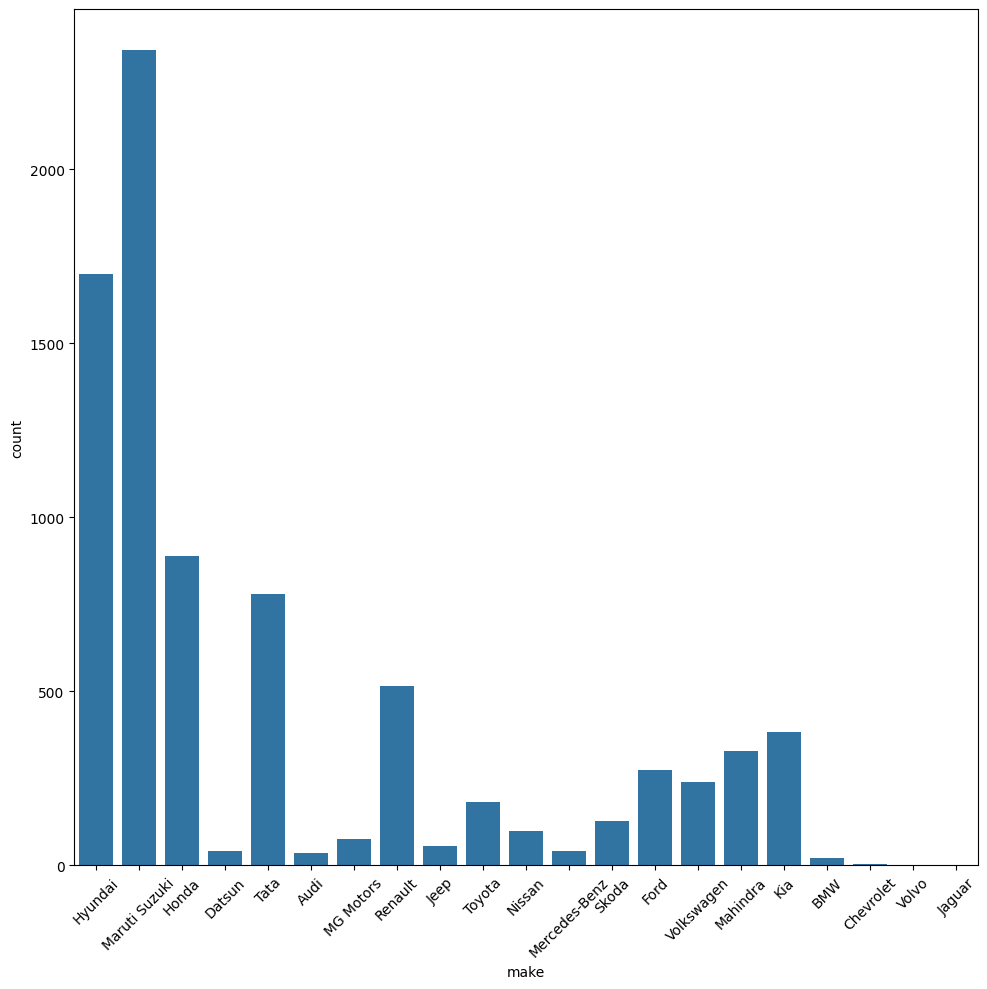

In [11]:
plt.figure(figsize=(10,10))
sns.countplot(data=df, x="make")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Which city have most number of resale cars🤔.

city names and number of cars for sale in each respective city.

In [ ]:
city_name = df["city"].value_counts()
print(type(city_name))

<class 'pandas.core.series.Series'>


<function matplotlib.pyplot.show(close=None, block=None)>

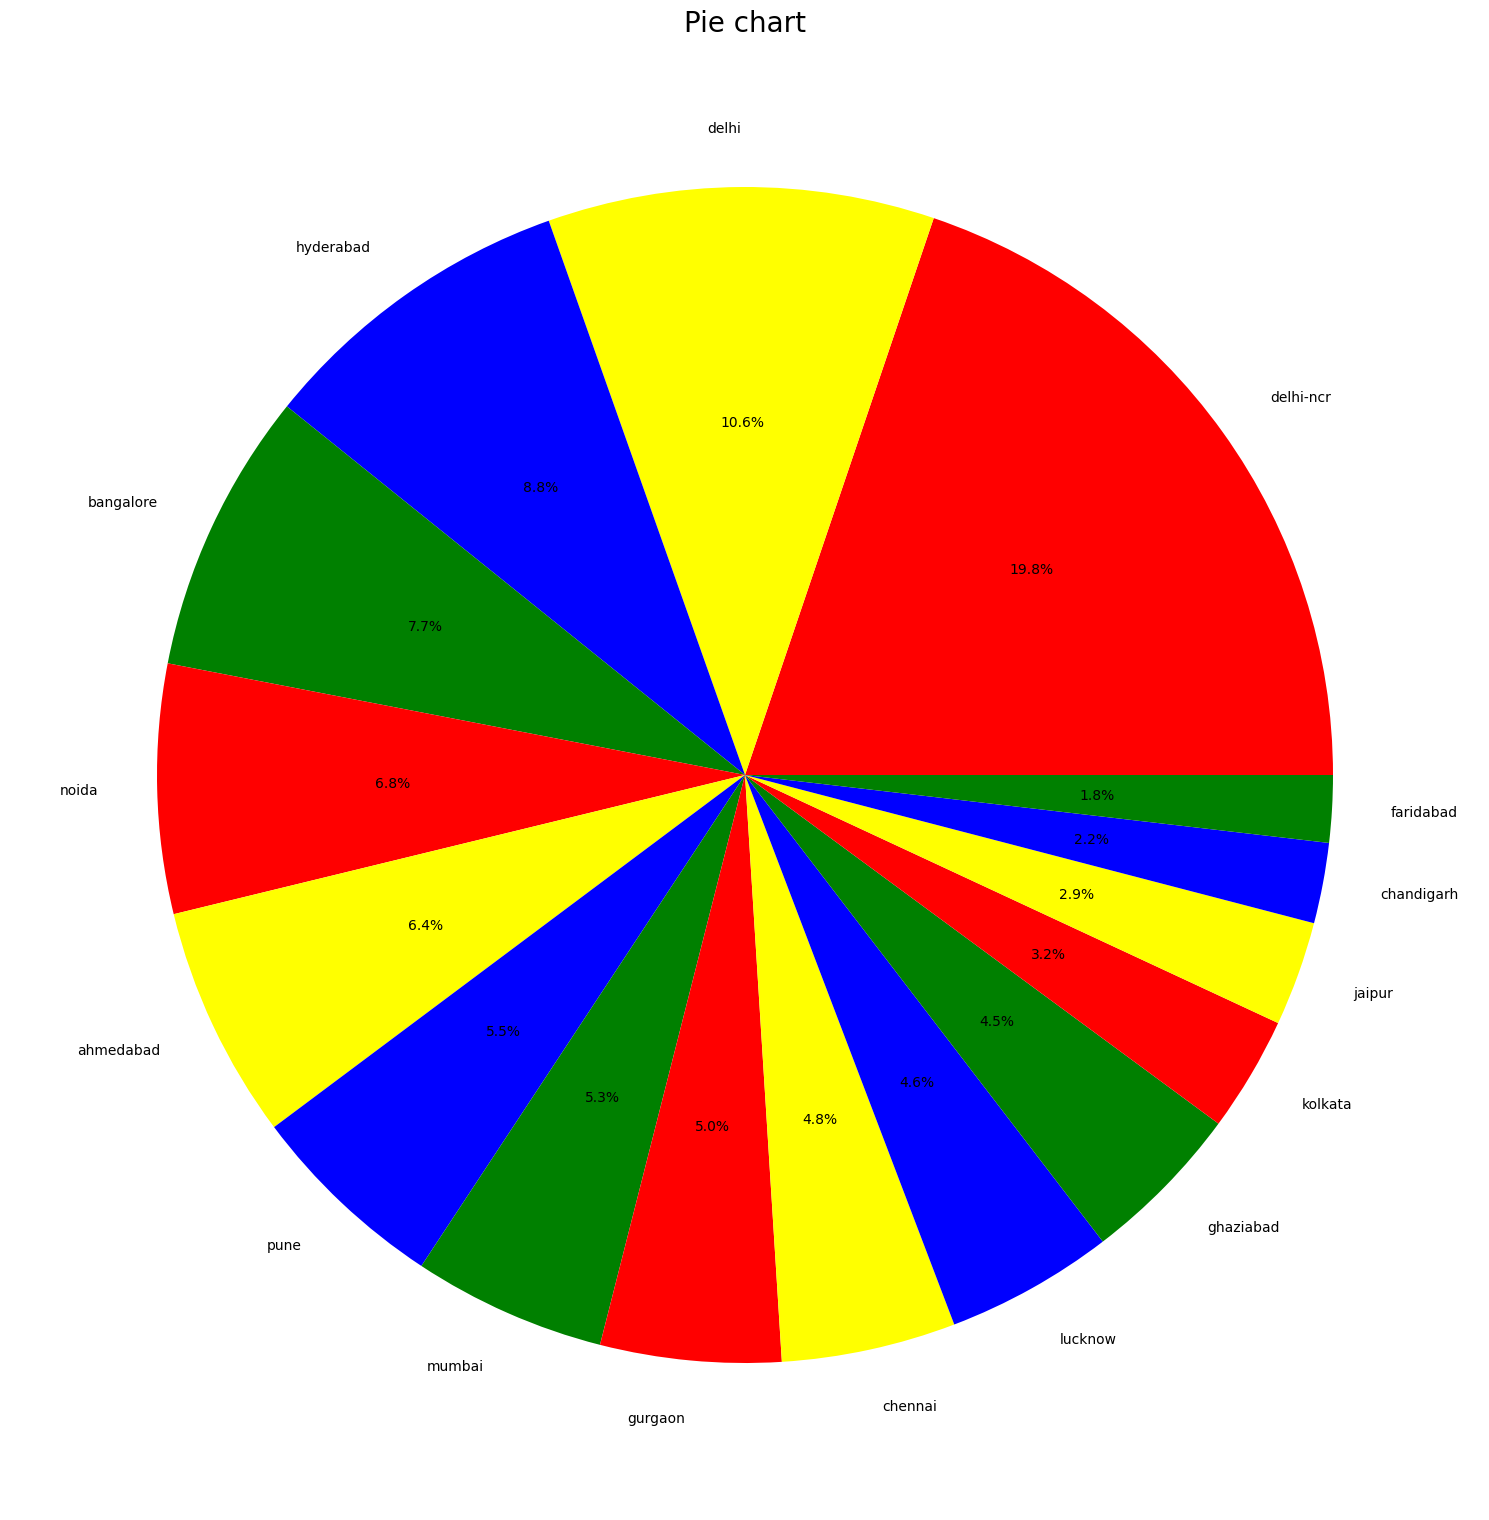

In [15]:
colors = ['red','yellow','blue','green']
labels = city_name.index
plt.figure(figsize=(15,15))
plt.pie(city_name.values,labels=labels,colors=colors,autopct='%1.1f%%')
plt.tight_layout()
plt.title("Pie chart", fontsize=20)
plt.show

Conclusion of pie chart - delhi-NCR , delhi , hyderabad , banglore are the cities with most cars for sale and so on.

In [ ]:
Till now prices seems to be best target label because after all we are checking the data for car sale aftermarket
and since it is continous variable this falls under supervised learning regression.

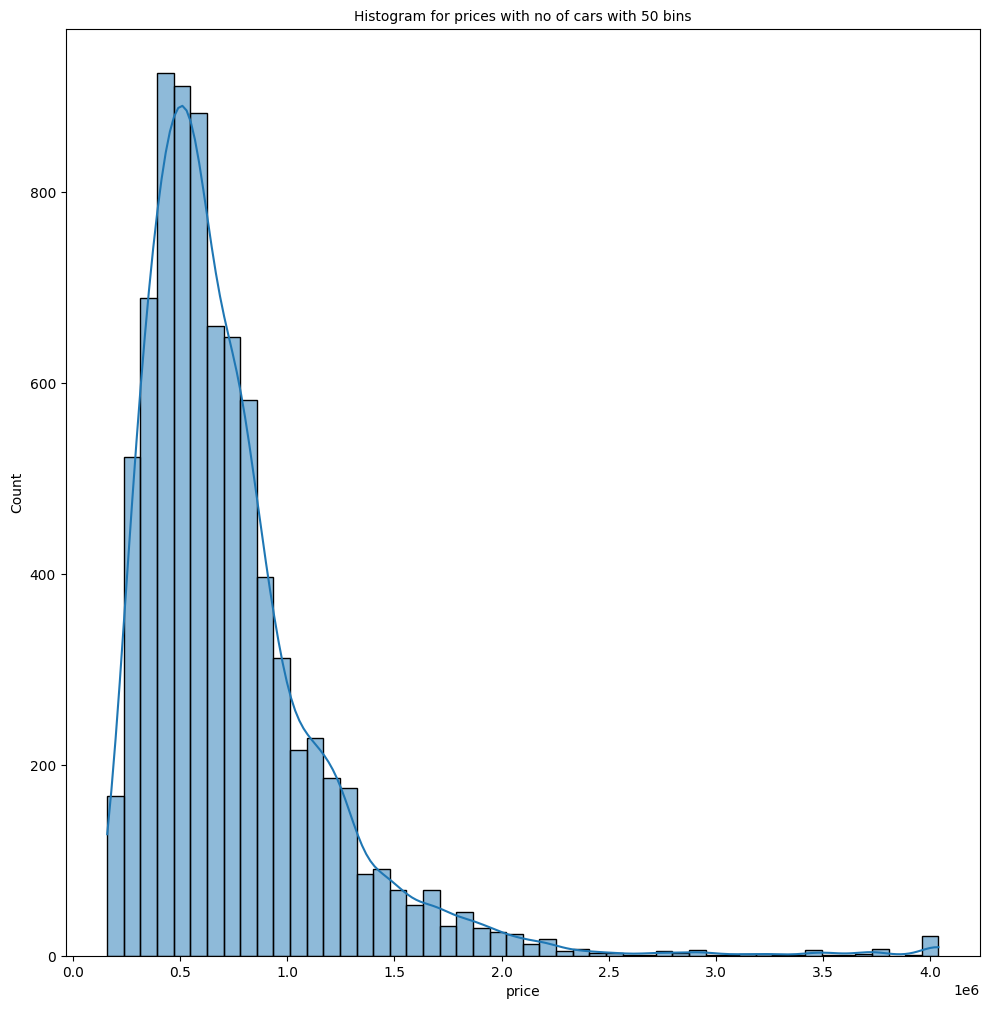

In [17]:
plt.figure(figsize=(10,10))
sns.histplot(data=df['price'],bins=50,kde='True')
plt.tight_layout()
plt.title("Histogram for prices with no of cars with 50 bins", fontsize=10)
plt.xlabel="price"
plt.ylabel="No of cars"
plt.show()

Now we plotted histogram for prices now we gonna focus on other important fetures that affect our data we gonna devide it numerical or categorical for numerical we gonna use scatterplot here and for categorical we will use boxplot.Numerical: mileage, make_year, price, no_of_owners, registration_year
Categorical: city, make, model, variant, fuel_type, color, body_type, transmission.

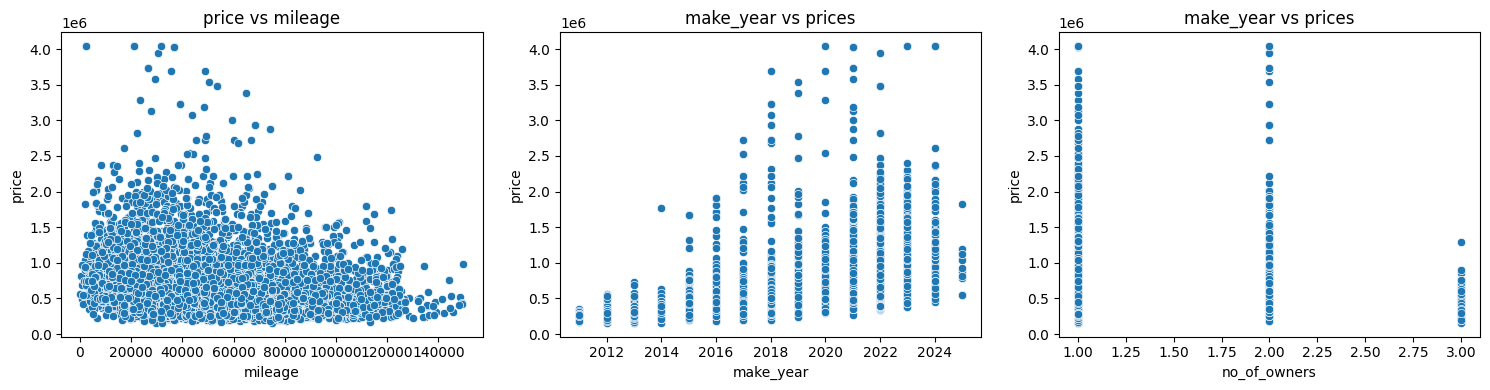

In [19]:
fig , axs = plt.subplots(1,3,figsize=(15,4))
# 1st plot price vs the mileage
sns.scatterplot(x='mileage',y='price',data=df ,ax=axs[0])
axs[0].set_title("price vs mileage")

# 2nd make_year vs the prices
sns.scatterplot(x='make_year', y= 'price', data=df , ax=axs[1])
axs[1].set_title("make_year vs prices")

# 3rd no_of_owners vs the prices
sns.scatterplot(x='no_of_owners', y= 'price', data=df , ax=axs[2])
axs[2].set_title("make_year vs prices")

plt.tight_layout()
plt.show()

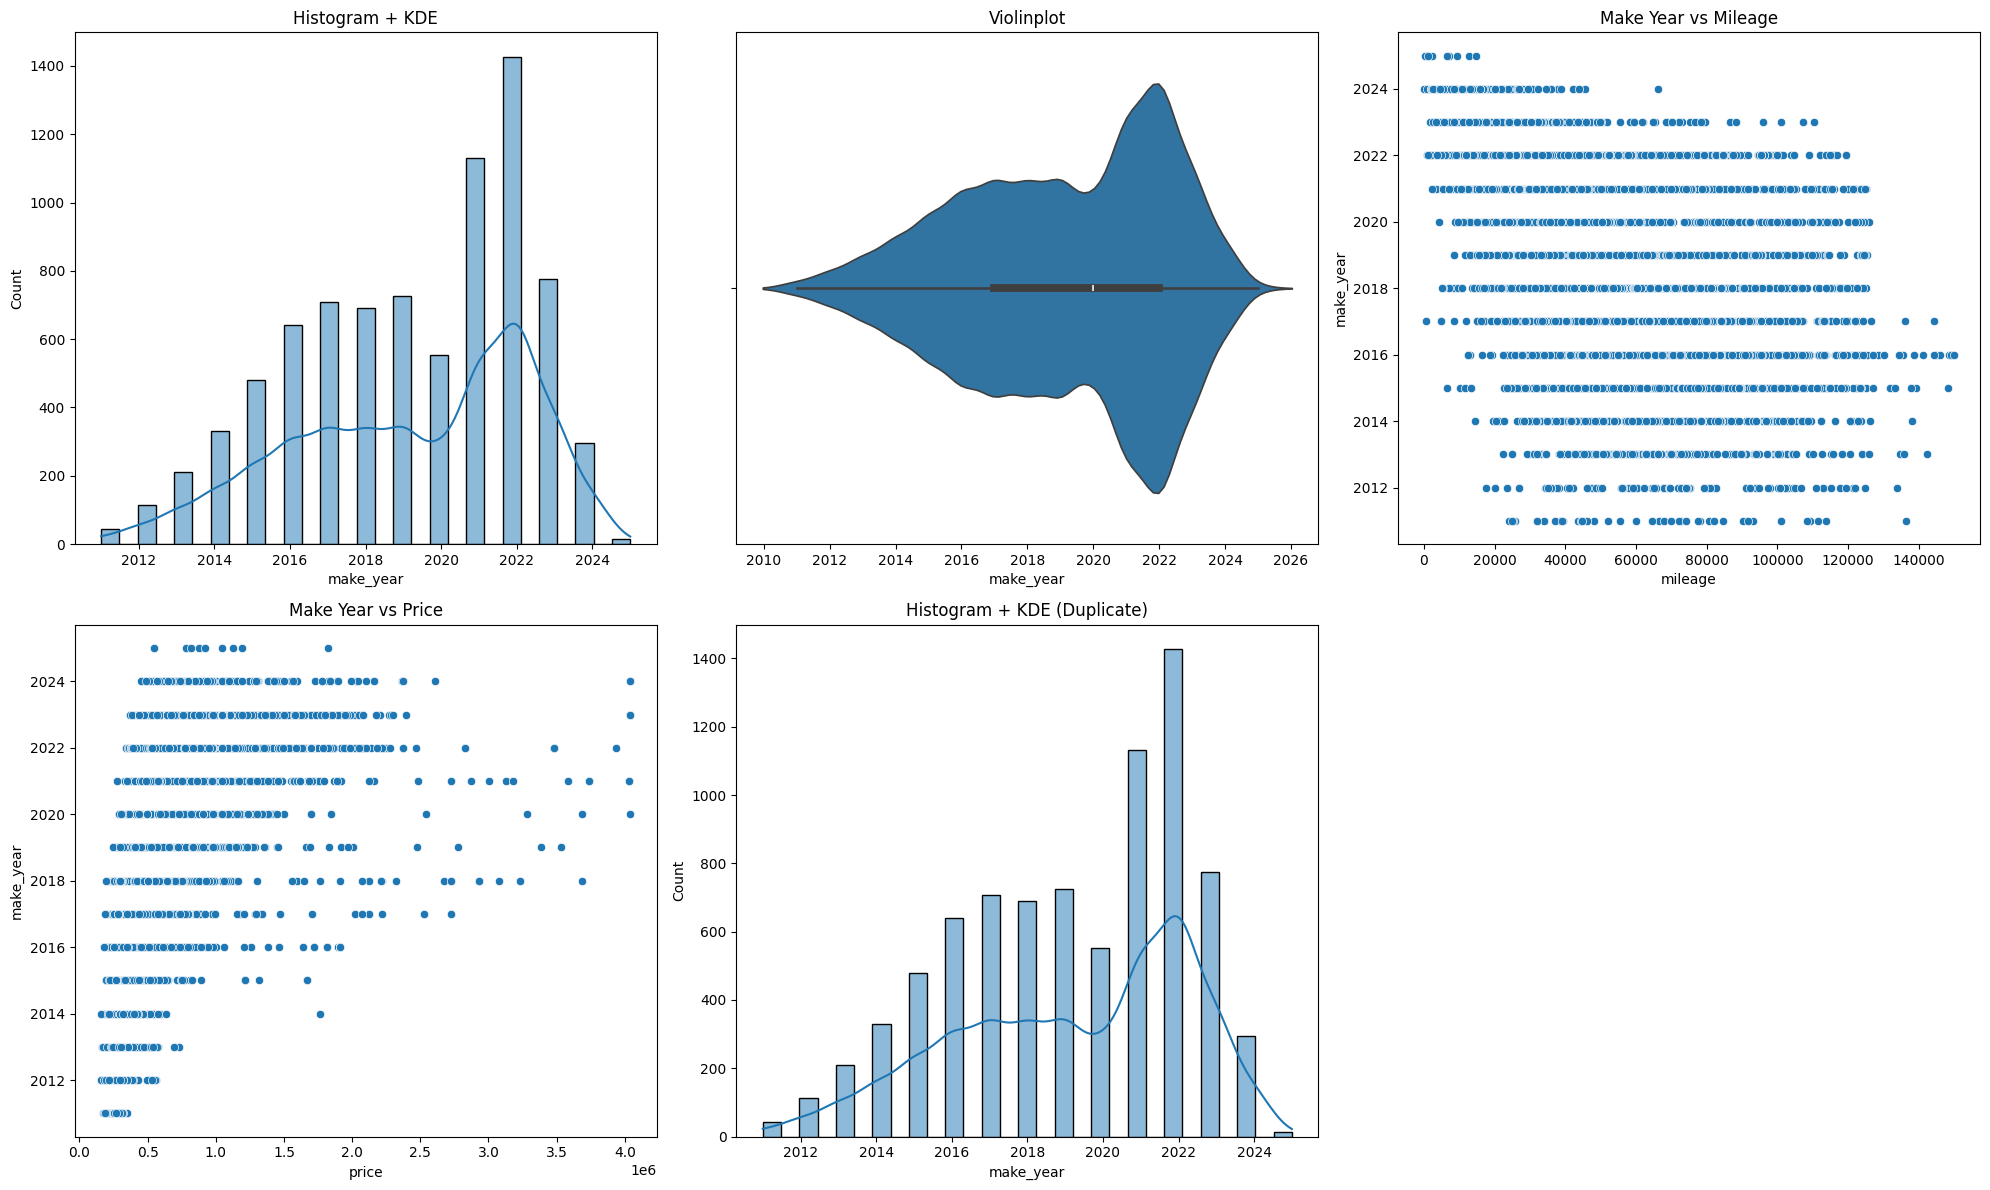

In [27]:
fig, axs = plt.subplots(2, 3, figsize=(20,12))

# 1 — Histogram + KDE
sns.histplot(df['make_year'], kde=True, ax=axs[0,0])
axs[0,0].set_title("Histogram + KDE")

# 2 — Violinplot
sns.violinplot(x=df['make_year'], ax=axs[0,1])
axs[0,1].set_title("Violinplot")

# 3 — Scatterplot vs Mileage
sns.scatterplot(x='mileage', y='make_year', data=df, ax=axs[0,2])
axs[0,2].set_title("Make Year vs Mileage")

# 4 — Scatterplot vs Price
sns.scatterplot(x='price', y='make_year', data=df, ax=axs[1,0])
axs[1,0].set_title("Make Year vs Price")

# 5 — Histogram + KDE again (optional)
sns.histplot(df['make_year'], kde=True, ax=axs[1,1])
axs[1,1].set_title("Histogram + KDE (Duplicate)")

# 6 — Empty slot
axs[1,2].axis('off')

plt.tight_layout()
plt.show()


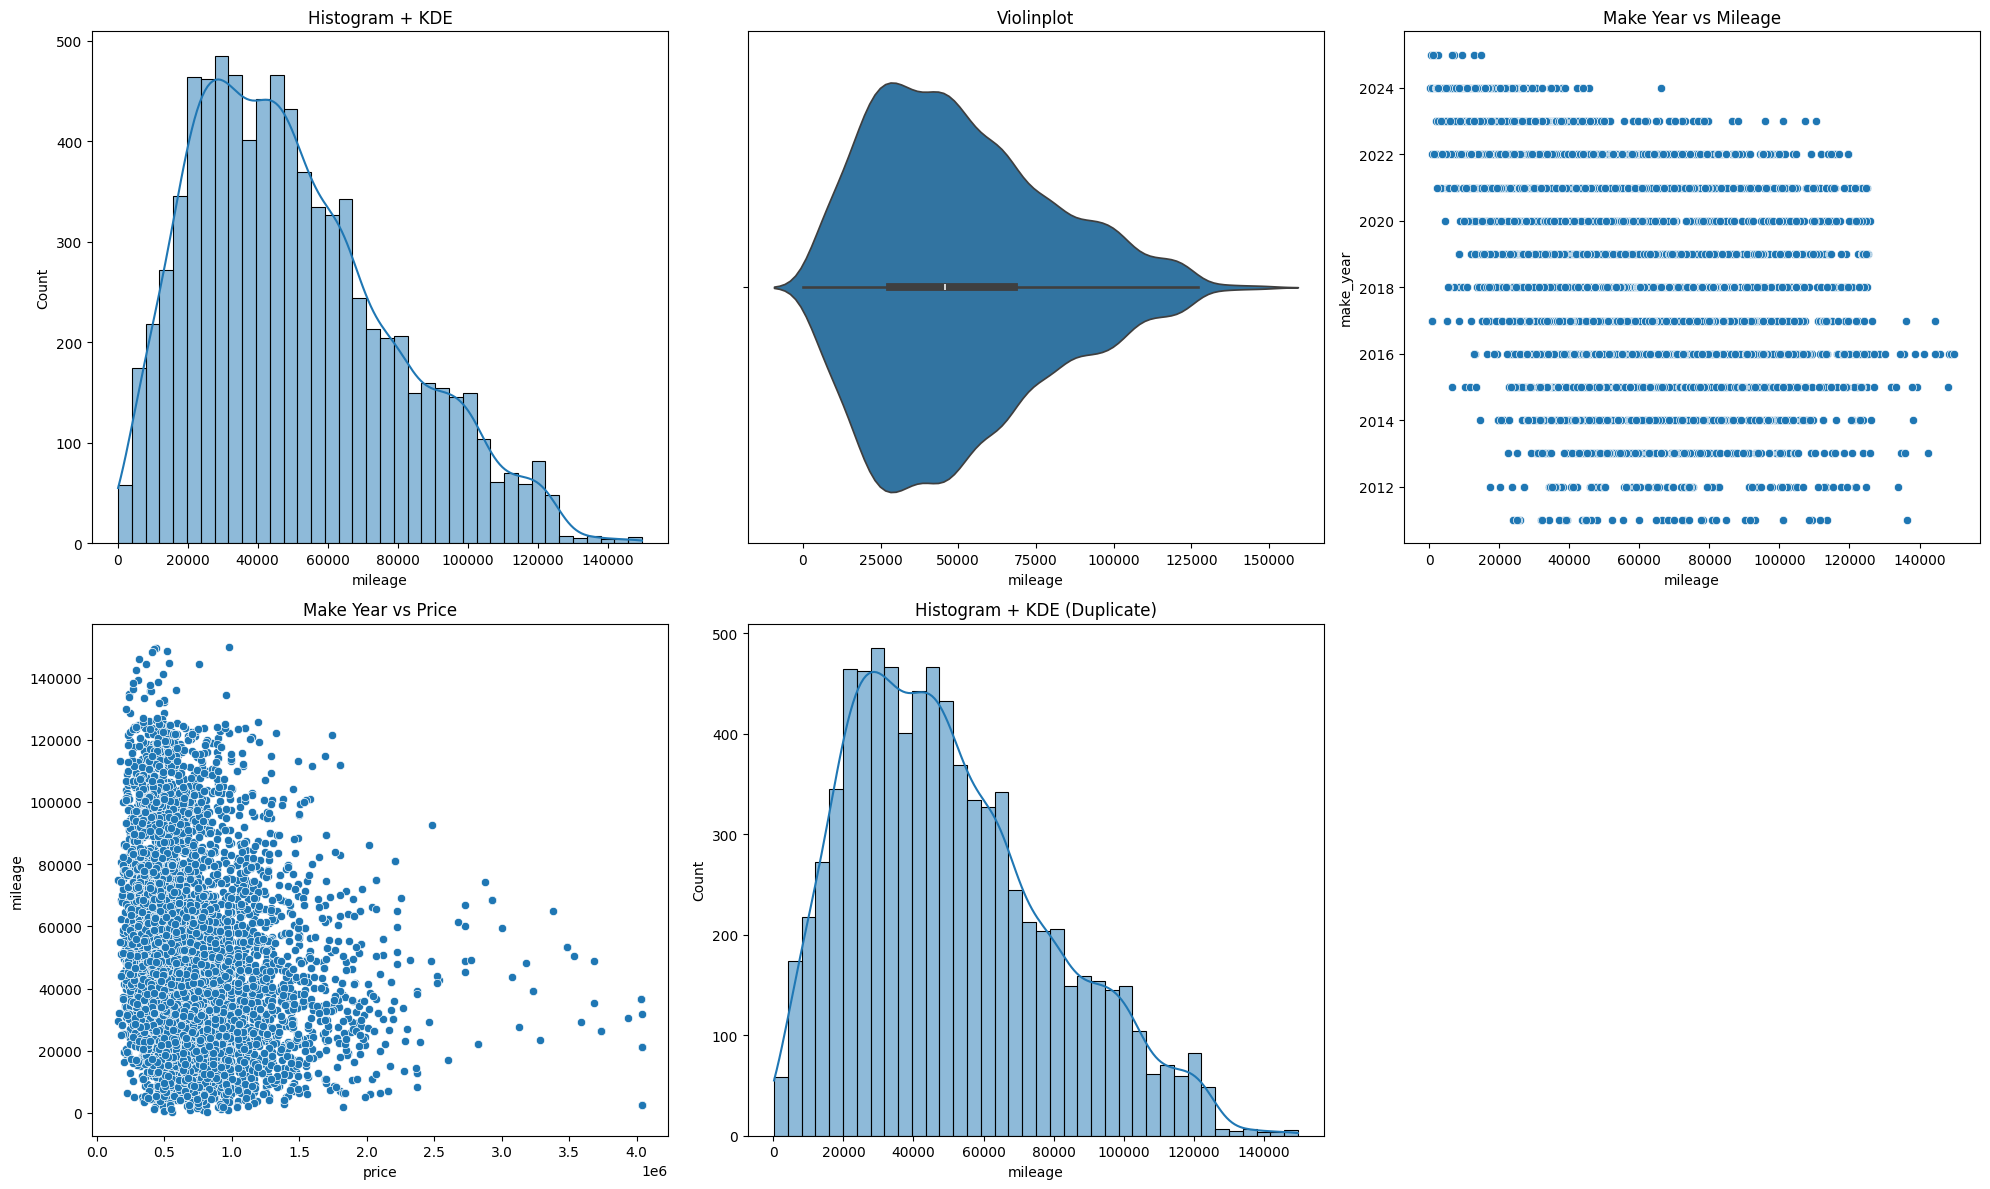

In [28]:
fig, axs = plt.subplots(2, 3, figsize=(20,12))

# 1 — Histogram + KDE
sns.histplot(df['mileage'], kde=True, ax=axs[0,0])
axs[0,0].set_title("Histogram + KDE")

# 2 — Violinplot
sns.violinplot(x=df['mileage'], ax=axs[0,1])
axs[0,1].set_title("Violinplot")

# 3 — Scatterplot vs Mileage
sns.scatterplot(x='mileage', y='make_year', data=df, ax=axs[0,2])
axs[0,2].set_title("Make Year vs Mileage")

# 4 — Scatterplot vs Price
sns.scatterplot(x='price', y='mileage', data=df, ax=axs[1,0])
axs[1,0].set_title("Make Year vs Price")

# 5 — Histogram + KDE again (optional)
sns.histplot(df['mileage'], kde=True, ax=axs[1,1])
axs[1,1].set_title("Histogram + KDE (Duplicate)")

# 6 — Empty slot
axs[1,2].axis('off')

plt.tight_layout()
plt.show()


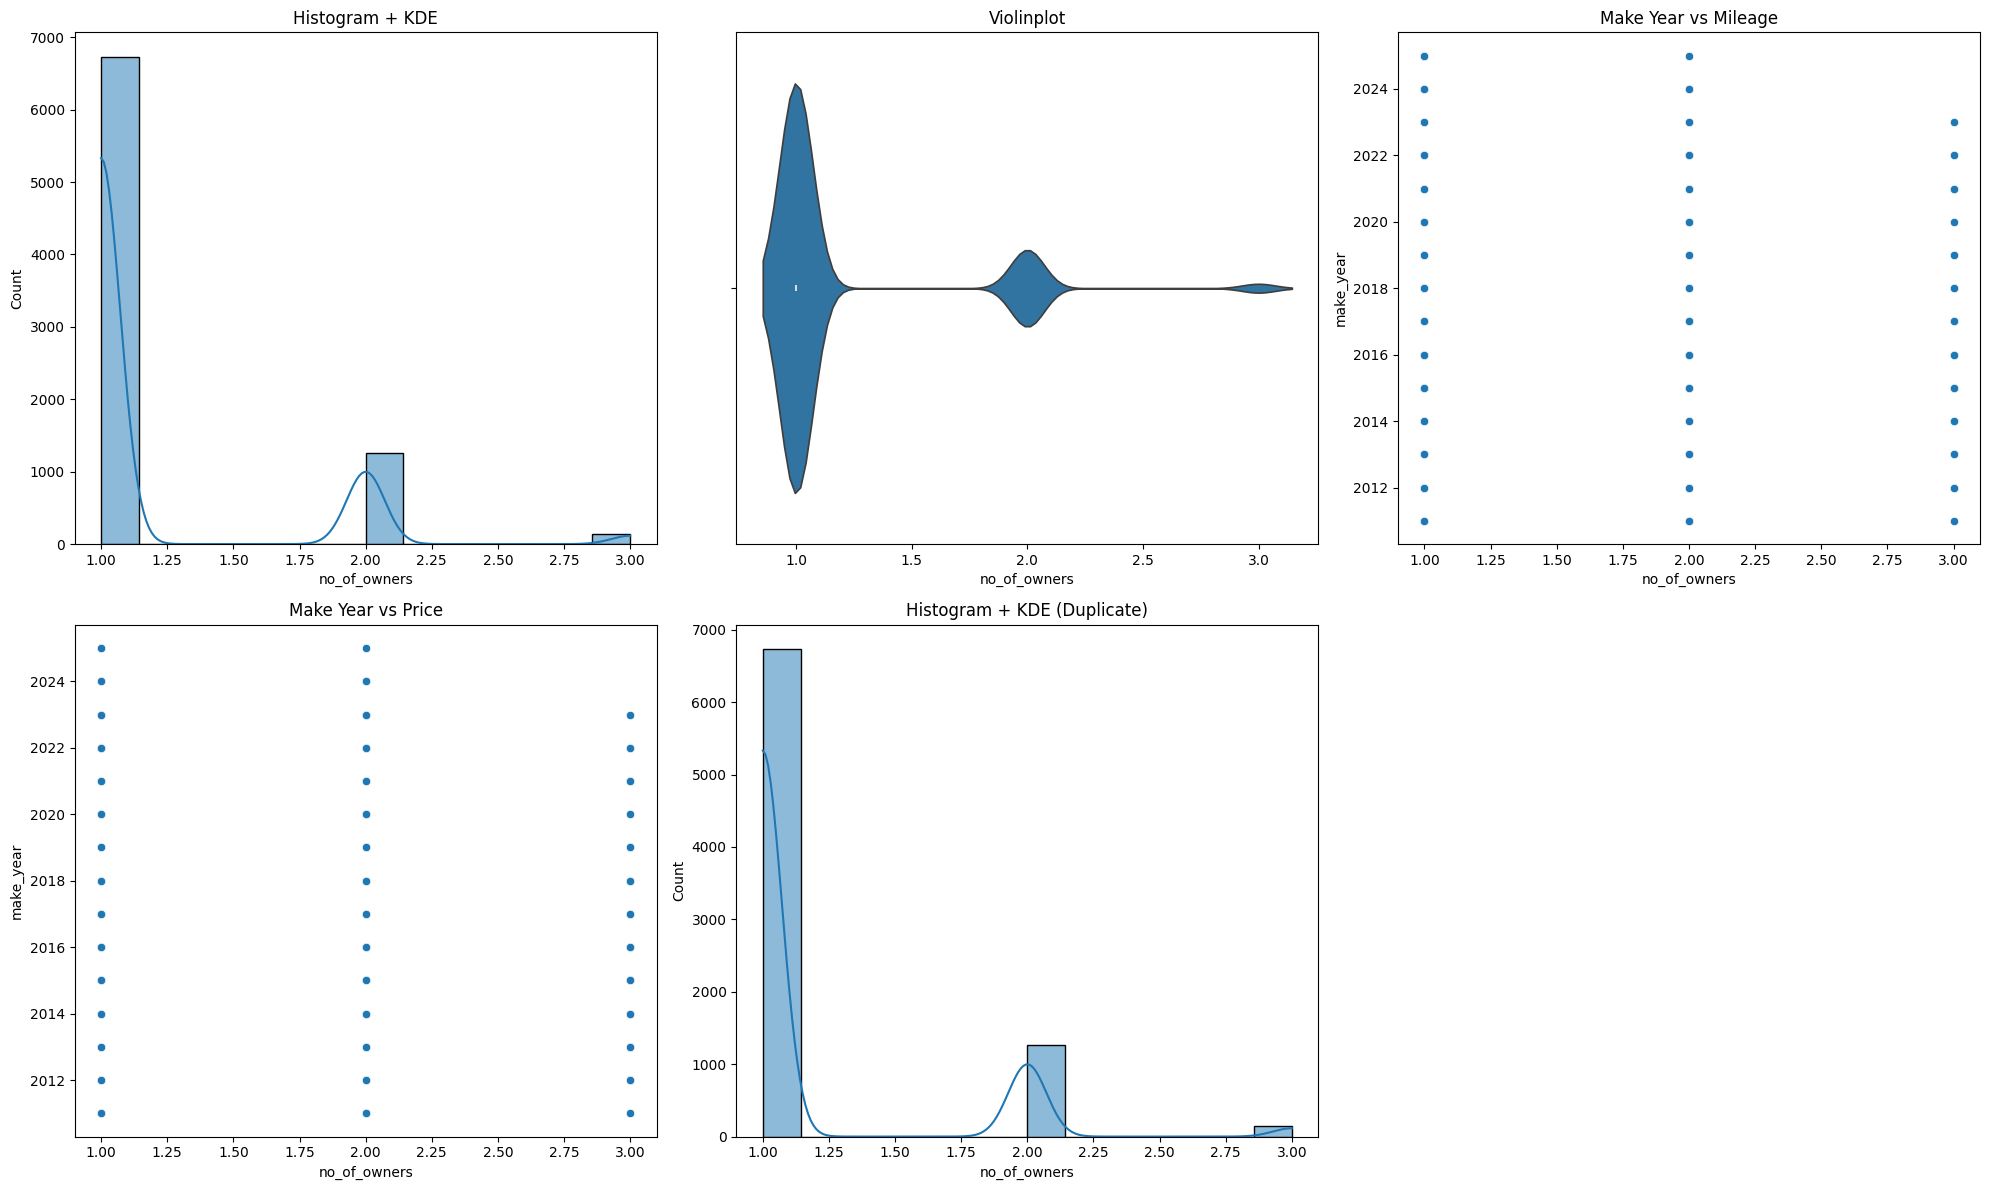

In [29]:
fig, axs = plt.subplots(2, 3, figsize=(20,12))

# 1 — Histogram + KDE
sns.histplot(df['no_of_owners'], kde=True, ax=axs[0,0])
axs[0,0].set_title("Histogram + KDE")

# 2 — Violinplot
sns.violinplot(x=df['no_of_owners'], ax=axs[0,1])
axs[0,1].set_title("Violinplot")

# 3 — Scatterplot vs Mileage
sns.scatterplot(x='no_of_owners', y='make_year', data=df, ax=axs[0,2])
axs[0,2].set_title("Make Year vs Mileage")

# 4 — Scatterplot vs Price
sns.scatterplot(x='no_of_owners', y='make_year', data=df, ax=axs[1,0])
axs[1,0].set_title("Make Year vs Price")

# 5 — Histogram + KDE again (optional)
sns.histplot(df['no_of_owners'], kde=True, ax=axs[1,1])
axs[1,1].set_title("Histogram + KDE (Duplicate)")

# 6 — Empty slot
axs[1,2].axis('off')

plt.tight_layout()
plt.show()


Now we can proceed for the categorical data onwards

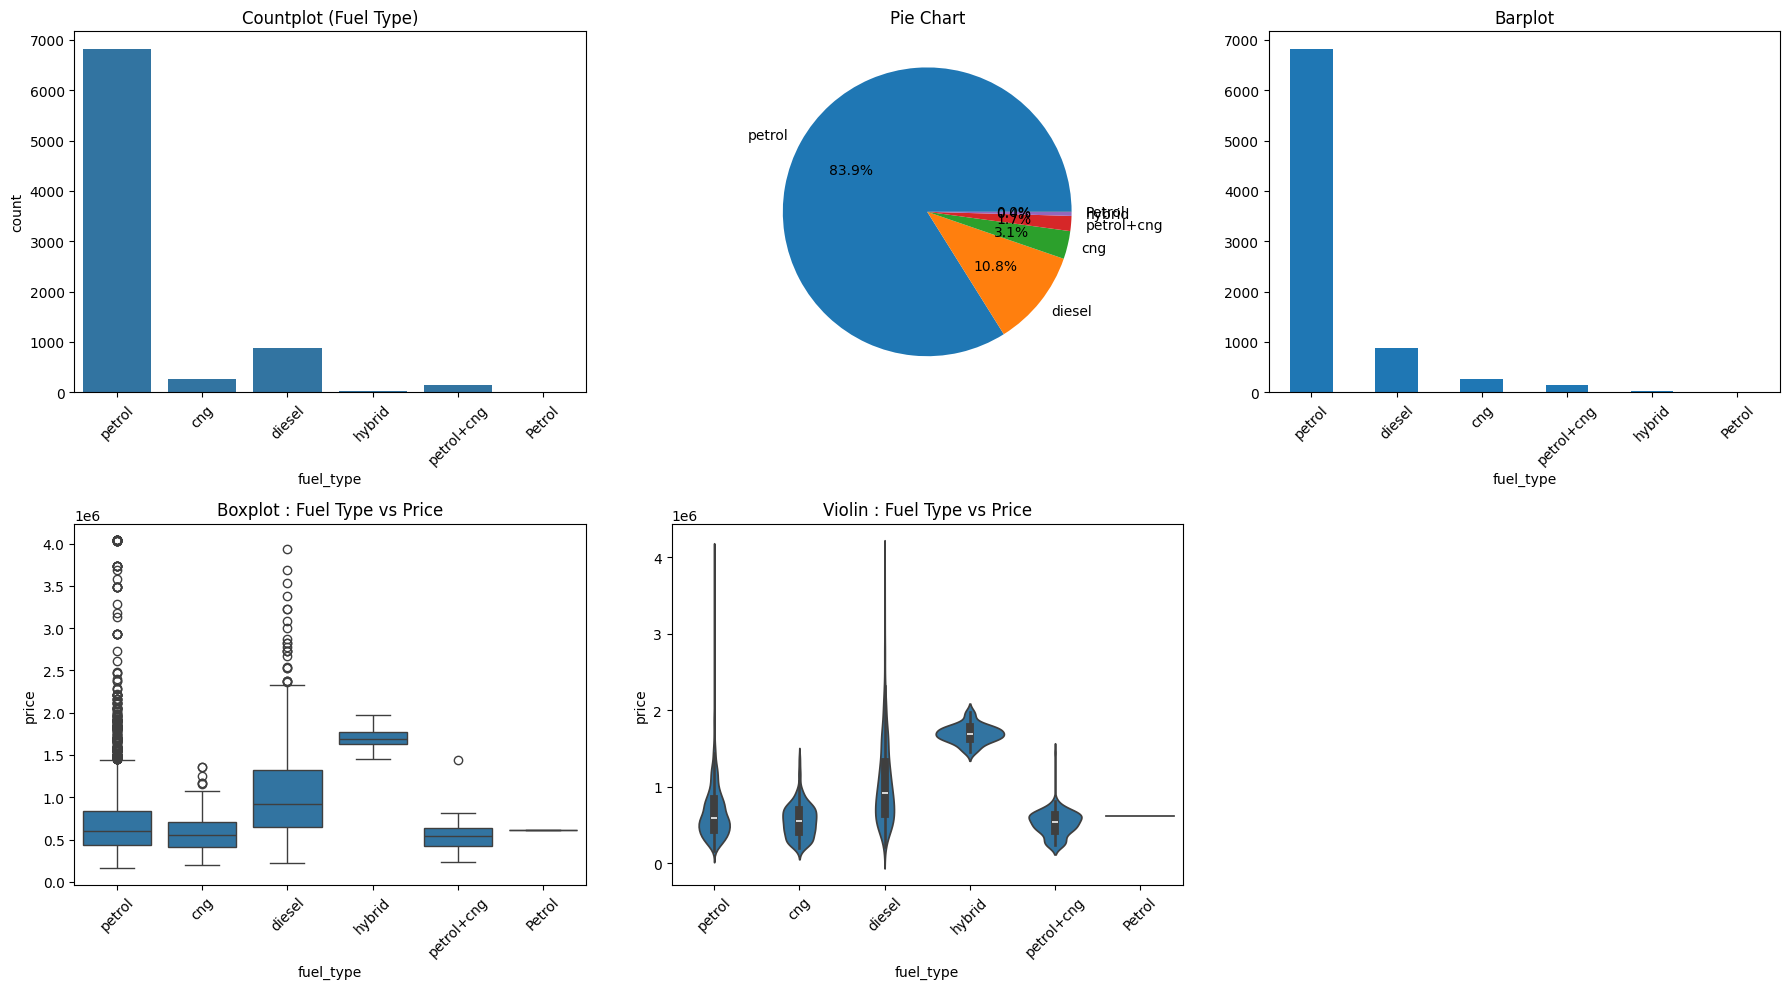

In [22]:
fig, axs = plt.subplots(2, 3, figsize=(18,10))

# 1 — Countplot
sns.countplot(data=df, x='fuel_type', ax=axs[0,0])
axs[0,0].set_title("Countplot (Fuel Type)")
axs[0,0].tick_params(axis='x', rotation=45)

# 2 — Pie Chart
df['fuel_type'].value_counts().plot.pie(autopct='%1.1f%%', ax=axs[0,1])
axs[0,1].set_title("Pie Chart")
axs[0,1].set_ylabel('')

# 3 — Barplot (absolute counts)
df['fuel_type'].value_counts().plot(kind='bar', ax=axs[0,2])
axs[0,2].set_title("Barplot")
axs[0,2].tick_params(axis='x', rotation=45)

# 4 — Boxplot vs Price
sns.boxplot(data=df, x='fuel_type', y='price', ax=axs[1,0])
axs[1,0].set_title("Boxplot : Fuel Type vs Price")
axs[1,0].tick_params(axis='x', rotation=45)

# 5 — Violinplot vs Price
sns.violinplot(data=df, x='fuel_type', y='price', ax=axs[1,1])
axs[1,1].set_title("Violin : Fuel Type vs Price")
axs[1,1].tick_params(axis='x', rotation=45)

# 6 — empty slot (for neat look)
axs[1,2].axis('off')

plt.tight_layout()
plt.show()


As we can see as of our target label variant and registration are not that important to us so we not gonna do eda for those columns

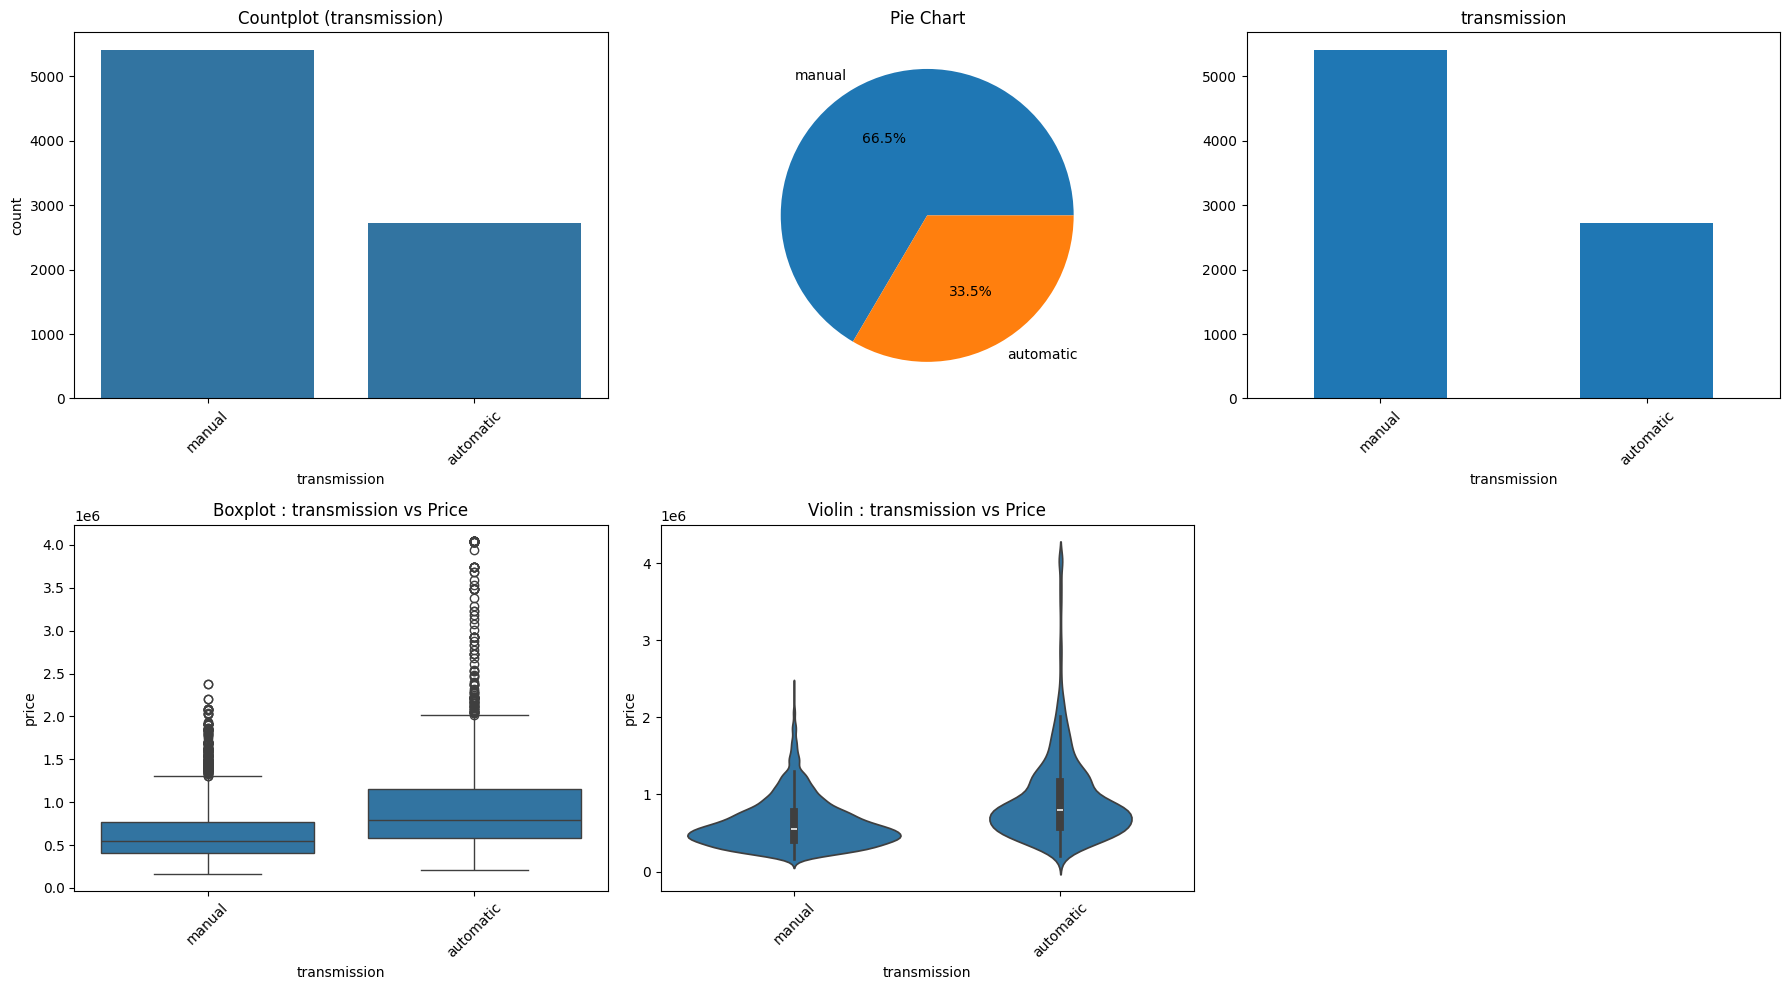

In [24]:
fig, axs = plt.subplots(2, 3, figsize=(18,10))

# 1 — Countplot
sns.countplot(data=df, x='transmission', ax=axs[0,0])
axs[0,0].set_title("Countplot (transmission)")
axs[0,0].tick_params(axis='x', rotation=45)

# 2 — Pie Chart
df['transmission'].value_counts().plot.pie(autopct='%1.1f%%', ax=axs[0,1])
axs[0,1].set_title("Pie Chart")
axs[0,1].set_ylabel('')

# 3 — Barplot (absolute counts)
df['transmission'].value_counts().plot(kind='bar', ax=axs[0,2])
axs[0,2].set_title("transmission")
axs[0,2].tick_params(axis='x', rotation=45)

# 4 — Boxplot vs Price
sns.boxplot(data=df, x='transmission', y='price', ax=axs[1,0])
axs[1,0].set_title("Boxplot : transmission vs Price")
axs[1,0].tick_params(axis='x', rotation=45)

# 5 — Violinplot vs Price
sns.violinplot(data=df, x='transmission', y='price', ax=axs[1,1])
axs[1,1].set_title("Violin : transmission vs Price")
axs[1,1].tick_params(axis='x', rotation=45)

# 6 — empty slot (for neat look)
axs[1,2].axis('off')

plt.tight_layout()
plt.show()


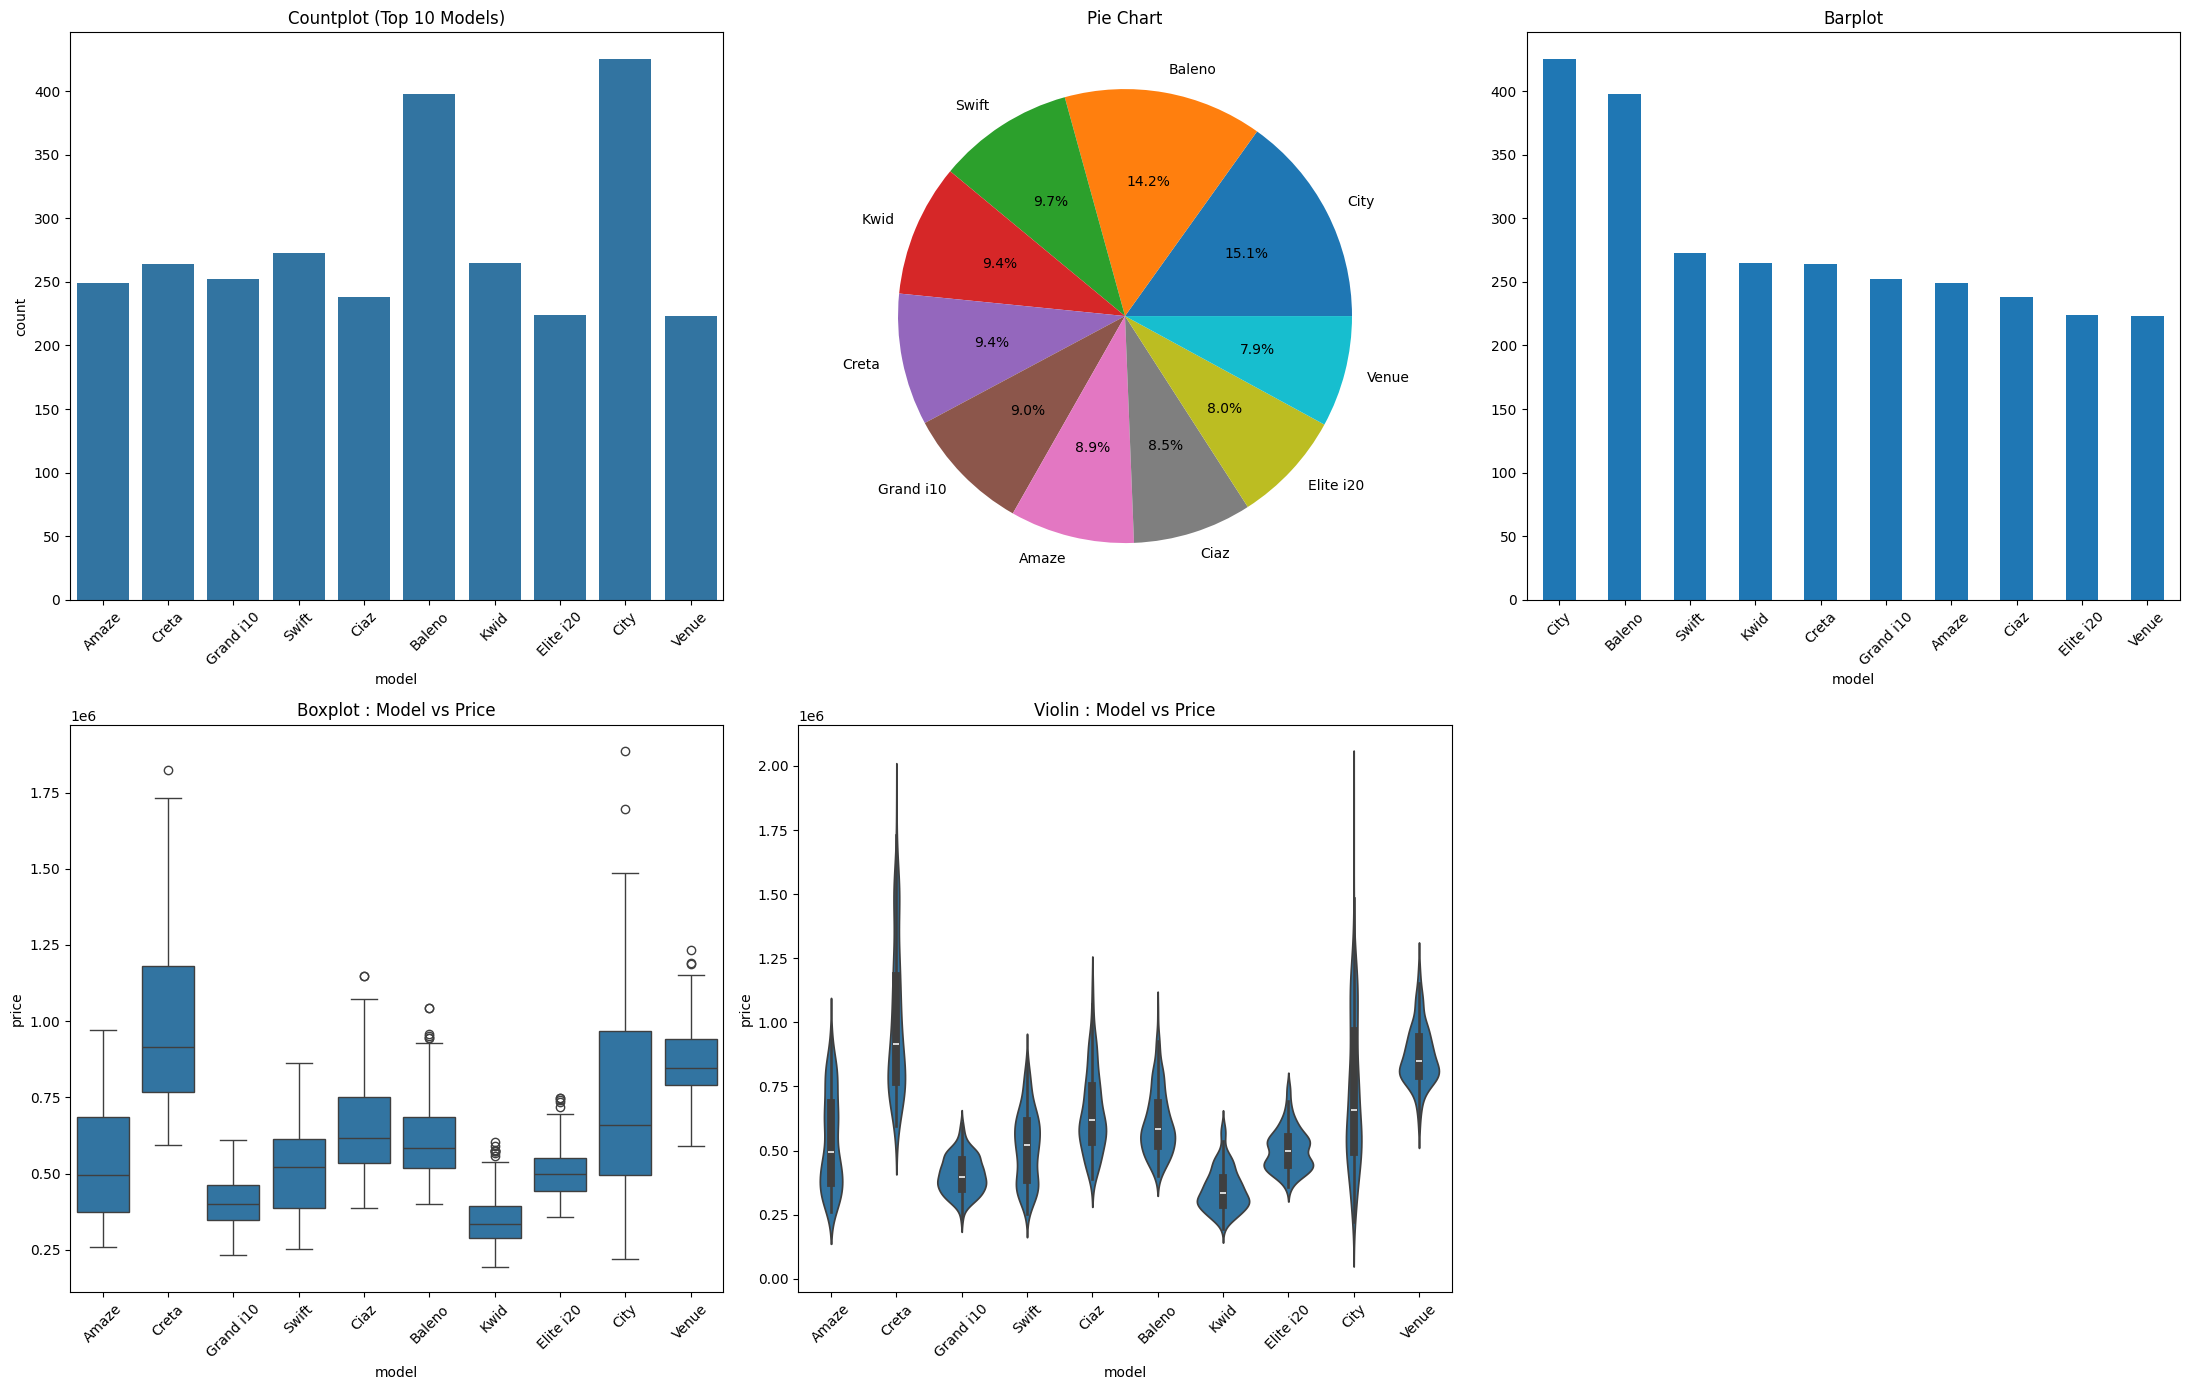

In [26]:
# Top 10 models
top_models = df['model'].value_counts().nlargest(10).index
df_top = df[df['model'].isin(top_models)]

fig, axs = plt.subplots(2, 3, figsize=(22,14))  # bigger figure

# 1 — Countplot
sns.countplot(data=df_top, x='model', ax=axs[0,0])
axs[0,0].set_title("Countplot (Top 10 Models)")
axs[0,0].tick_params(axis='x', rotation=45)

# 2 — Pie Chart
df_top['model'].value_counts().plot.pie(autopct='%1.1f%%', ax=axs[0,1])
axs[0,1].set_title("Pie Chart")
axs[0,1].set_ylabel('')

# 3 — Barplot
df_top['model'].value_counts().plot(kind='bar', ax=axs[0,2])
axs[0,2].set_title("Barplot")
axs[0,2].tick_params(axis='x', rotation=45)

# 4 — Boxplot vs Price
sns.boxplot(data=df_top, x='model', y='price', ax=axs[1,0])
axs[1,0].set_title("Boxplot : Model vs Price")
axs[1,0].tick_params(axis='x', rotation=45)

# 5 — Violinplot vs Price
sns.violinplot(data=df_top, x='model', y='price', ax=axs[1,1])
axs[1,1].set_title("Violin : Model vs Price")
axs[1,1].tick_params(axis='x', rotation=45)

# 6 — Empty slot
axs[1,2].axis('off')

plt.tight_layout()
plt.show()


Note : performed EDA on model so make is not that much important now because model give us more imformation as compared to make 